In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df_rates = pd.DataFrame(
    {
        "author": pd.Categorical(['ours_1', 'ours_2', 'ours_3', 'gardner2013', 'neckel2014', \
                                  'kaab2015', 'brun2017', 'shean2020', 'yi2020', 'wang2021', \
                                  'hugonnet2021_1', 'hugonnet2021_2', 'hugonnet2021_3', 'jakob2021', \
                                  'zhao2022_1', 'zhao2022_2']),
        "data": pd.Categorical(['icesat/icesat-2/aster dems/cryosat-2', 'icesat/icesat-2/aster dems/cryosat-2', \
                                'icesat/icesat-2/aster dems/cryosat-2', 'icesat', 'icesat', \
                                  'icesat', 'aster dems', 'worldview-123/geoeye-2/aster dems', 'icesat/grace', \
                                    'icesat/icesat-2/grace/grace-fo', 'aster dems', 'aster dems', 'aster dems', \
                                    'cryosat-2', 'aster dems/cryosat-2/icesat/icesat-2/grace/grace-fo',\
                                    'aster dems/cryosat-2/icesat/icesat-2/grace/grace-fo']),
        "period": pd.Categorical(['2000-2022', '2000-2012', '2012-2022', '2003-2009', '2003-2009', \
                                  '2003-2008', '2000-2016', '2000-2018', '2002-2017', '2003-2019', \
                                  '2000-2019', '2000-2009', '2010-2019', '2010-2019', '2000-2019',\
                                    '2011-2020']),
        "rate": np.array([-0.711, -0.58, -0.78, -0.40, -0.81, -1.34, -0.73, -0.54, -0.79, -1.07, -0.69, \
                         -0.55, -0.81, -1.15, -0.71, -0.87]),
        "rate_error": np.array([0.05, 0.05, 0.04, 0.41, 0.32, 0.29, 0.27, 0.16, 0.09, 0.1, 0.35, 0.28, \
                                0.41, 0.12, 0.18, 0.13])
    }
)
df_rates




,author,data,period,rate,rate_error
0,ours_1,icesat/icesat-2/aster dems/cryosat-2,2000-2022,-0.711,0.05
1,ours_2,icesat/icesat-2/aster dems/cryosat-2,2000-2012,-0.580,0.05
2,ours_3,icesat/icesat-2/aster dems/cryosat-2,2012-2022,-0.780,0.04
3,gardner2013,icesat,2003-2009,-0.400,0.41
4,neckel2014,icesat,2003-2009,-0.810,0.32
5,kaab2015,icesat,2003-2008,-1.340,0.29
6,brun2017,aster dems,2000-2016,-0.730,0.27
7,shean2020,worldview-123/geoeye-2/aster dems,2000-2018,-0.540,0.16
8,yi2020,icesat/grace,2002-2017,-0.790,0.09
9,wang2021,icesat/icesat-2/grace/grace-fo,2003-2019,-1.070,0.10


In [4]:
x_years = [i for i in range(23)]
x_ticks = [str(year) for year in range(2000,2023)]


In [5]:
def box_plot(df_rates, author, ax, color):
    year_range = df_rates[df_rates['author']==author]['period'].iat[0]
    rate = df_rates[df_rates['author']==author]['rate'].iat[0]
    rate_error = df_rates[df_rates['author']==author]['rate_error'].iat[0]
    year_start, year_end = year_range[0:4], year_range[5:]
    x_year_start = np.where(np.array(x_ticks) == year_start)[0]
    x_year_end = np.where(np.array(x_ticks) == year_end)[0]
    ax.hlines(y=df_rates[df_rates['author']==author]['rate'].iat[0], xmin=x_year_start, xmax=x_year_end, colors=color, linestyles='solid')
    # ax.fill_between([i for i in range(int(x_year_start), int(x_year_end)+1)], rate - rate_error, rate + rate_error,
    #                     color='none', edgecolor=color, linewidth=1.6, alpha=1, linestyle='dashed')



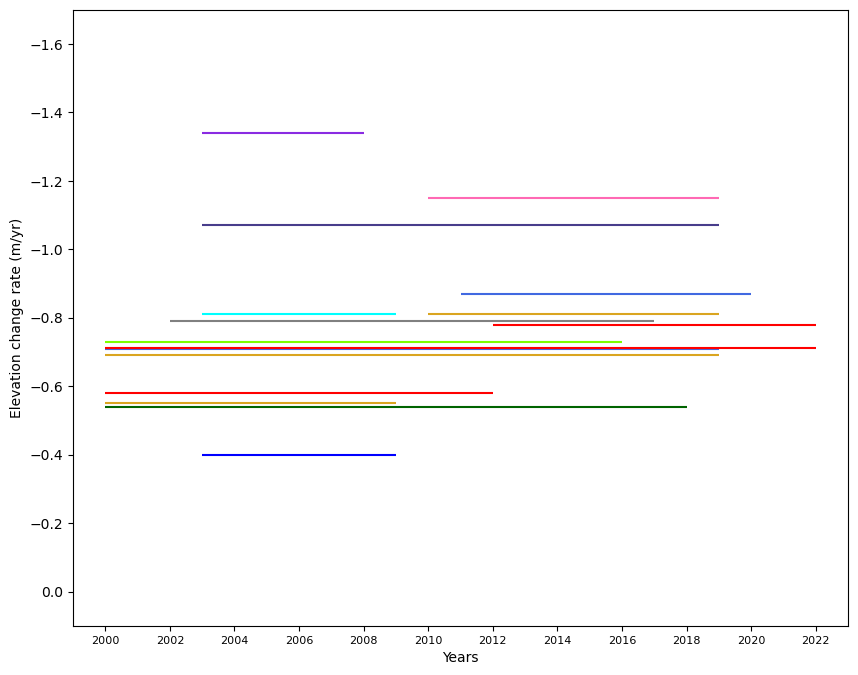

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax.set_xticks(x_years[::2], x_ticks[::2], fontsize=8)
ax.set_xlim(left=-1, right=23)
ax.set_ylim(bottom=-1.7, top=0.1)
ax.set_xlabel('Years')
ax.set_ylabel('Elevation change rate (m/yr)')
ax.invert_yaxis()
box_plot(df_rates=df_rates, author='gardner2013', ax=ax, color='blue')
box_plot(df_rates=df_rates, author='neckel2014', ax=ax, color='aqua')
box_plot(df_rates=df_rates, author='kaab2015', ax=ax, color='blueviolet')
box_plot(df_rates=df_rates, author='brun2017', ax=ax, color='Chartreuse')
box_plot(df_rates=df_rates, author='shean2020', ax=ax, color='darkgreen')
box_plot(df_rates=df_rates, author='yi2020', ax=ax, color='Gray')
box_plot(df_rates=df_rates, author='wang2021', ax=ax, color='darkslateblue')
box_plot(df_rates=df_rates, author='hugonnet2021_1', ax=ax, color='GoldenRod')
box_plot(df_rates=df_rates, author='hugonnet2021_2', ax=ax, color='GoldenRod')
box_plot(df_rates=df_rates, author='hugonnet2021_3', ax=ax, color='GoldenRod')
box_plot(df_rates=df_rates, author='jakob2021', ax=ax, color='HotPink')
box_plot(df_rates=df_rates, author='zhao2022_1', ax=ax, color='RoyalBlue')
box_plot(df_rates=df_rates, author='zhao2022_2', ax=ax, color='RoyalBlue')
box_plot(df_rates=df_rates, author='ours_1', ax=ax, color='red')
box_plot(df_rates=df_rates, author='ours_2', ax=ax, color='red')
box_plot(df_rates=df_rates, author='ours_3', ax=ax, color='red')



In [24]:
df_rates_single = pd.DataFrame(
    {
        "author": pd.Categorical(['ours_1', 'ours_2', 'ours_3', 'ours_4']),
        "data": pd.Categorical(['icesat', 'icesat-2', 'cryosat-2', 'aster dems']),
        "period": pd.Categorical(['2003-2009', '2018-2022', '2010-2022', '2000-2022']),
        "rate": np.array([-1.18, -0.34, -1.065, -0.60]),
        "rate_error": np.array([0.44, 0.12, 0.11, 0.30])
    }
)
df_rates_single


,author,period,data,rate,rate_error
0,ours_1,2003-2009,icesat,-1.180,0.44
1,ours_2,2018-2022,icesat-2,-0.340,0.12
2,ours_3,2010-2022,cryosat-2,-1.065,0.11
3,ours_4,2000-2022,aster dems,-0.600,0.30


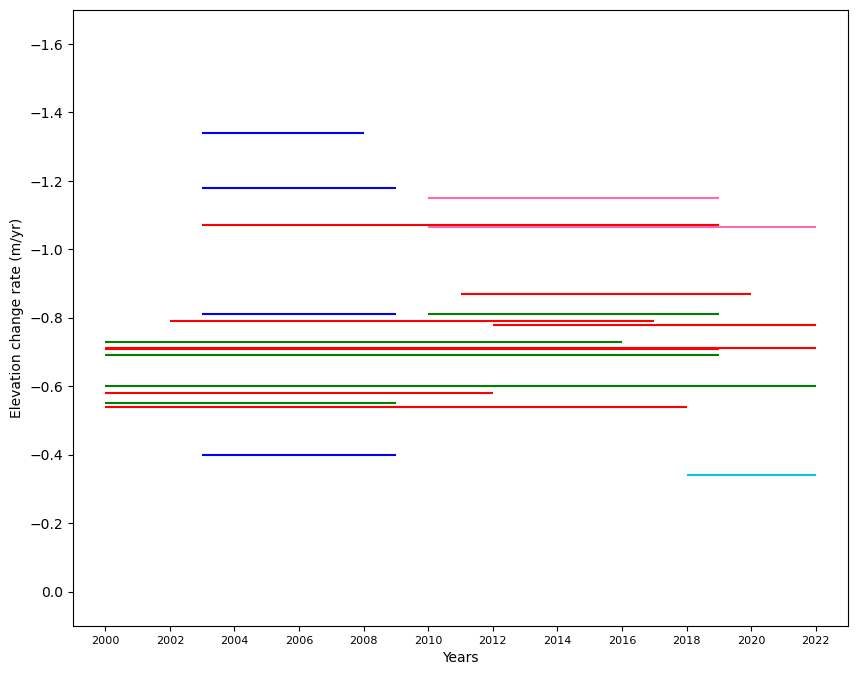

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax.set_xticks(x_years[::2], x_ticks[::2], fontsize=8)
ax.set_xlim(left=-1, right=23)
ax.set_ylim(bottom=-1.7, top=0.1)
ax.set_xlabel('Years')
ax.set_ylabel('Elevation change rate (m/yr)')
ax.invert_yaxis()
box_plot(df_rates=df_rates, author='gardner2013', ax=ax, color='blue')
box_plot(df_rates=df_rates, author='neckel2014', ax=ax, color='blue')
box_plot(df_rates=df_rates, author='kaab2015', ax=ax, color='blue')
box_plot(df_rates=df_rates, author='brun2017', ax=ax, color='green')
box_plot(df_rates=df_rates, author='shean2020', ax=ax, color='red')
box_plot(df_rates=df_rates, author='yi2020', ax=ax, color='red')
box_plot(df_rates=df_rates, author='wang2021', ax=ax, color='red')
box_plot(df_rates=df_rates, author='hugonnet2021_1', ax=ax, color='green')
box_plot(df_rates=df_rates, author='hugonnet2021_2', ax=ax, color='green')
box_plot(df_rates=df_rates, author='hugonnet2021_3', ax=ax, color='green')
box_plot(df_rates=df_rates, author='jakob2021', ax=ax, color='HotPink')
box_plot(df_rates=df_rates, author='zhao2022_1', ax=ax, color='red')
box_plot(df_rates=df_rates, author='zhao2022_2', ax=ax, color='red')
box_plot(df_rates=df_rates, author='ours_1', ax=ax, color='red')
box_plot(df_rates=df_rates, author='ours_2', ax=ax, color='red')
box_plot(df_rates=df_rates, author='ours_3', ax=ax, color='red')
box_plot(df_rates=df_rates_single, author='ours_1', ax=ax, color='blue')
box_plot(df_rates=df_rates_single, author='ours_2', ax=ax, color='DarkTurquoise')
box_plot(df_rates=df_rates_single, author='ours_3', ax=ax, color='HotPink')
box_plot(df_rates=df_rates_single, author='ours_4', ax=ax, color='green')

